In [ ]:
# 🚴‍♂️ Bike Sales Analysis

## 📌 Project Objective
# Help a bike company identify high-revenue customers and countries to expand into, using sales data.

## 🔍 Key Questions Answered
# Who are our top customers?
# Which countries generate the most revenue per customer?
# What age group should we target with marketing?

# This analysis will include exploratory analysis, and actionable insights.


In [ ]:
# 🚲 Bike Sales Analysis

## 🧠 Project Objective
Help a bike company identify high-revenue customers and countries to expand into, using sales data.

## 🔍 Key Questions Answered
- Who are our top customers?
- Which countries generate the most revenue per customer?
- What age group should we target with marketing?

## 📊 Tools Used
- Python (pandas, matplotlib, seaborn)
- Jupyter Notebook

## 📈 Summary of Findings
- Australia and Germany have the highest revenue per customer.
- 28-year-olds generate the most revenue by age.
- Age group 35–64 has the highest group spending power.




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df= pd.read_csv(r"C:\Users\osaze\OneDrive\Desktop\MySQL\Projects\Datasets\Sales Data for Bike Company.csv")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [9]:
#Converted the 'Date' column from string to datetime format for accurate time-based analysis.
df['Date']= pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [10]:
#Converted the 'Customer_Age' column from string to numeric format for accurate analysis.
df['Customer_Age'] = pd.to_numeric(df['Customer_Age'], errors='coerce')
print(df['Customer_Age'].dtype)

int64


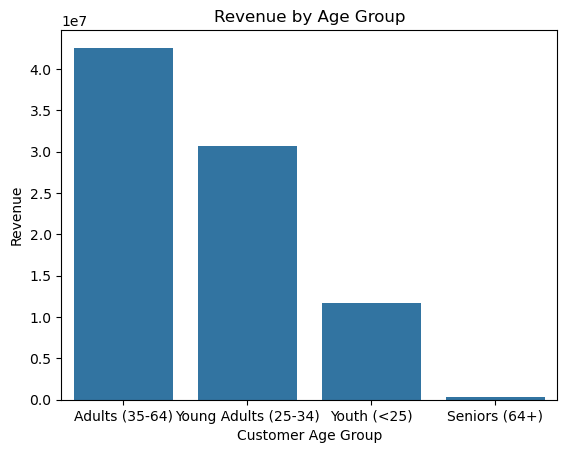

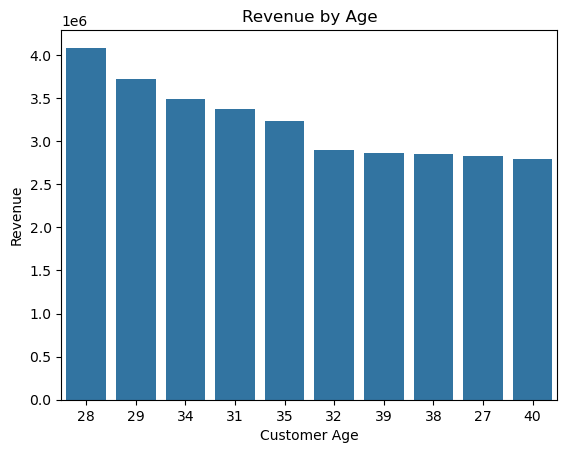

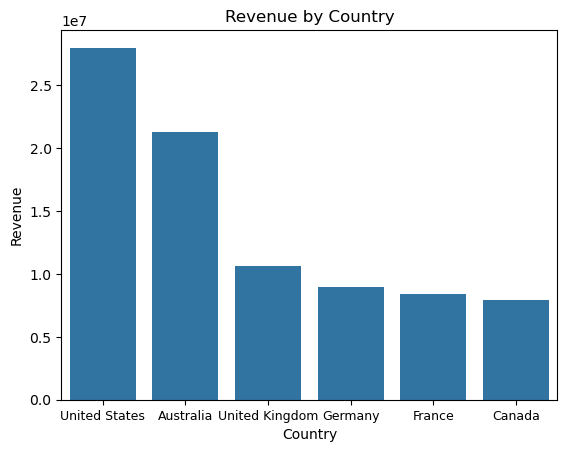

In [11]:
# 📊 Which customers generate the most revenue?
# 👉 Analyze top-selling customer segments by age group, specific age, and country.

# Grouping by Age Group
top_customer_by_age_group = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Grouping by Specific Age
top_customer_by_age = df.groupby('Customer_Age')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

# Grouping by Country
top_customer_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Barplot: Revenue by Age Group
sns.barplot(data=top_customer_by_age_group, x='Age_Group', y='Revenue')
plt.title('Revenue by Age Group')
plt.xlabel("Customer Age Group")
plt.ylabel('Revenue')
plt.show()

# 📝 Insight: Adults aged 35–64 generate the highest overall revenue compared to other age groups.

# Barplot: Revenue by Specific Age
sns.barplot(data=top_customer_by_age, x='Customer_Age', y='Revenue', order=top_customer_by_age['Customer_Age'])
plt.title('Revenue by Age')
plt.xlabel("Customer Age")
plt.ylabel('Revenue')
plt.show()

# 📝 Insight: 28-year-olds are the single age group with the highest revenue contribution.
# Note: The broader 35–64 age group contains more customers, which is why it's the overall top segment.

# Barplot: Revenue by Country
sns.barplot(data=top_customer_by_country, x='Country', y='Revenue')
plt.title('Revenue by Country')
plt.xlabel("Country")
plt.ylabel('Revenue')
plt.xticks(fontsize=9)
plt.show()

# 📝 Insight: The United States leads in total revenue by a significant margin.


          Country  Revenue Per Customer
0       Australia            889.959016
1         Germany            809.028293
2  United Kingdom            781.659031
3          France            766.764139
4   United States            713.552696
5          Canada            559.721964


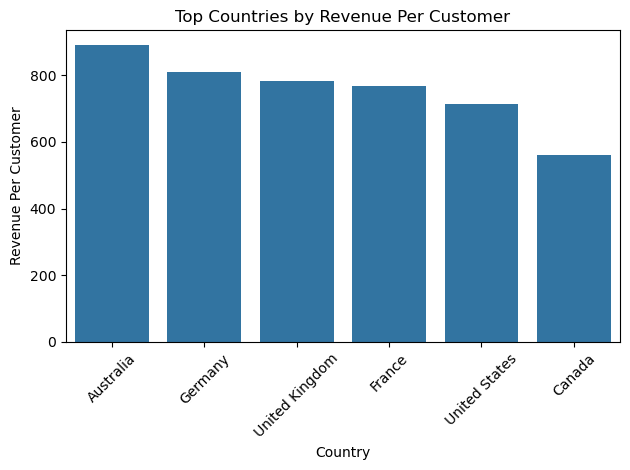

In [12]:
# 💡 "Which countries should we focus on growing next?"
# 👉 Objective: Identify countries with high revenue per customer to target for expansion.

# Calculate revenue per customer by country
revenue_per_customer = df.groupby('Country')['Revenue'].sum() / df['Country'].value_counts()
revenue_per_customer = revenue_per_customer.sort_values(ascending=False).reset_index()
revenue_per_customer.columns = ['Country', 'Revenue Per Customer']

# Display the results
print(revenue_per_customer)

# Visualize 
sns.barplot(data=revenue_per_customer.head(10), x='Country', y='Revenue Per Customer')
plt.title('Top Countries by Revenue Per Customer')
plt.xticks(rotation=45)
plt.ylabel('Revenue Per Customer')
plt.tight_layout()
plt.show()

# 📝 Insight:
# Australia and Germany rank highest in revenue per customer despite not being the top overall revenue contributors.
# 🎯 Recommendation:
# These countries show strong purchasing power. Increase marketing efforts, customer acquisition, and local partnerships there to boost overall revenue without sacrificing profitability.


     Sub_Category    Profit
0      Road Bikes  10078875
1  Mountain Bikes   8160463
2   Touring Bikes   2279938


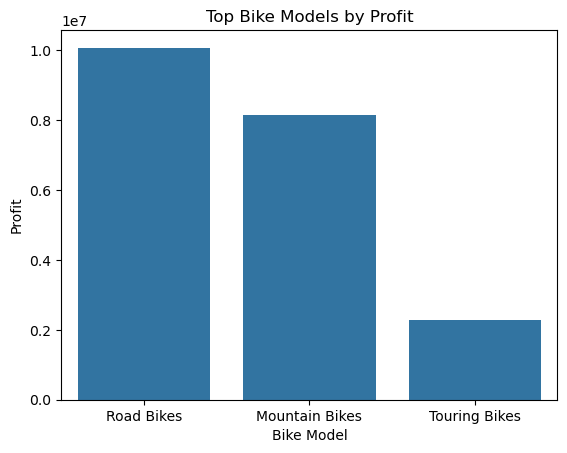

In [13]:
# 💰 “I want to make more money. Which bike models should I focus on to boost profits?”
# 👉 Objective: Identify the top-performing bike models based on profit.

# Filter for only Bike sales and group by model (Sub_Category)
top_bike_model = df[df['Product_Category'] == 'Bikes'].groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()

# Display the result
print(top_bike_model)

# Visualize the top bike models by revenue
sns.barplot(data=top_bike_model, x='Sub_Category', y='Profit')
plt.title('Top Bike Models by Profit')
plt.xlabel('Bike Model')
plt.ylabel('Profit')
plt.show()

# 📝 Insight: Road Bikes is the most profitable Bike model.
# Recommendation: Prioritize marketing, inventory, and availability of Road Bikes to maximize profit growth.


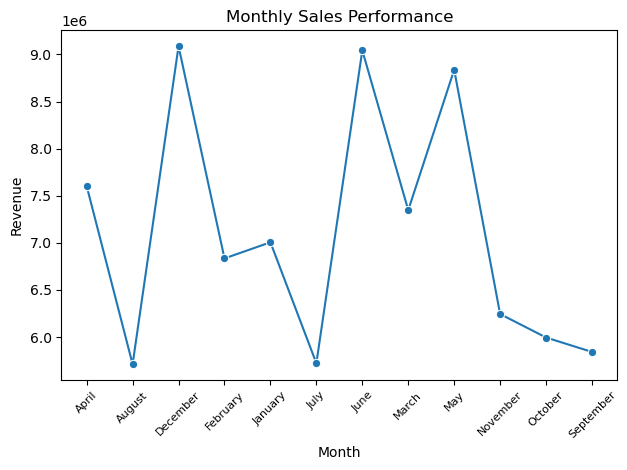

In [14]:
# 📈 "When during the year do my sales spike? How can I time promotions to maximize revenue?"
# 👉 Objective: Identify peak months for sales to inform marketing and inventory strategy.

# Group revenue by month and sort in descending order
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# Visualize revenue trends across months
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# 📝 Insight: December shows the highest revenue, likely due to holiday-season sales.
# 🎯 Recommendation: Launch promotions and increase stock availability leading into Q4, especially November–December, to capitalize on peak demand.
